In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Root directory to Top Country CSV folder
rootdir = Path('Top Country CSV')

# Loops through each csv file in Top Country CSV folder
file_list = [f for f in rootdir.glob("*.csv") if f.is_file()]

In [3]:
# Store country name
country_name = str(file_list[0]).split("\\")[-1].split("_")[0]

# Convert first csv into DataFrame
country_df = pd.read_csv(file_list[0])

# Drops unecessary column
country_df = country_df.drop(columns = 'Unnamed: 0')

# Insert country name column
country_df.insert(0, "Country", country_name)
country_df.head()

,Country,Artists Name,Artist ID,Track Name,Track ID,Release Date,Popularity,Danceability,Energy
0,Argentina,Daddy Yankee,4VMYDCV2IEDYJArk749S6m,Con Calma,5w9c2J52mkdntKOmRLeM2m,2019-01-24,96,0.737,0.860
1,Argentina,Pedro Capó,4QVBYiagIaa6ZGSPMbybpy,Calma - Remix,5iwz1NiezX7WWjnCgY5TH4,2018-10-05,96,0.826,0.773
2,Argentina,Anuel Aa,2R21vXR83lH98kGeO99Y66,Secreto,5W83ErFkO3aKAIS1WMi6u0,2019-01-15,95,0.807,0.803
3,Argentina,Paulo Londra,3vQ0GE3mI0dAaxIMYe5g7z,Adan y Eva,6FyRXC8tJUh863JCkyWqtk,2018-11-05,94,0.767,0.709
4,Argentina,Mau y Ricky,2wkoKEfS6dXwThbyTnZWFU,Desconocidos,0s5DNDV6LAKn2u2Ufa3VjQ,2018-10-12,92,0.709,0.771


In [4]:
# Loop starts at second file and ends at last
for file in file_list[1:]:
    country_name = str(file).split("\\")[-1].split("_")[0]
    
    # Convert excel into DataFrame
    df = pd.read_csv(file)
    
    # Drop unecessary columns and insert country
    df = df.drop(columns = 'Unnamed: 0')
    df.insert(0, "Country", country_name)
    
    # Add each country DataFrame onto the first
    country_df = country_df.append(df)

In [5]:
# Grab only country column and danceability column
country_df = country_df[["Country", "Danceability"]]

In [6]:
# Mean of danceability for each country
country_danceability_mean = country_df.groupby("Country").mean()
country_danceability_mean

,Danceability
Country,
Argentina,0.74480
Australia,0.68442
Brazil,0.69928
Canada,0.72234
Columbia,0.74518
France,0.73628
Germany,0.74504
Indonesia,0.63892
Japan,0.57940


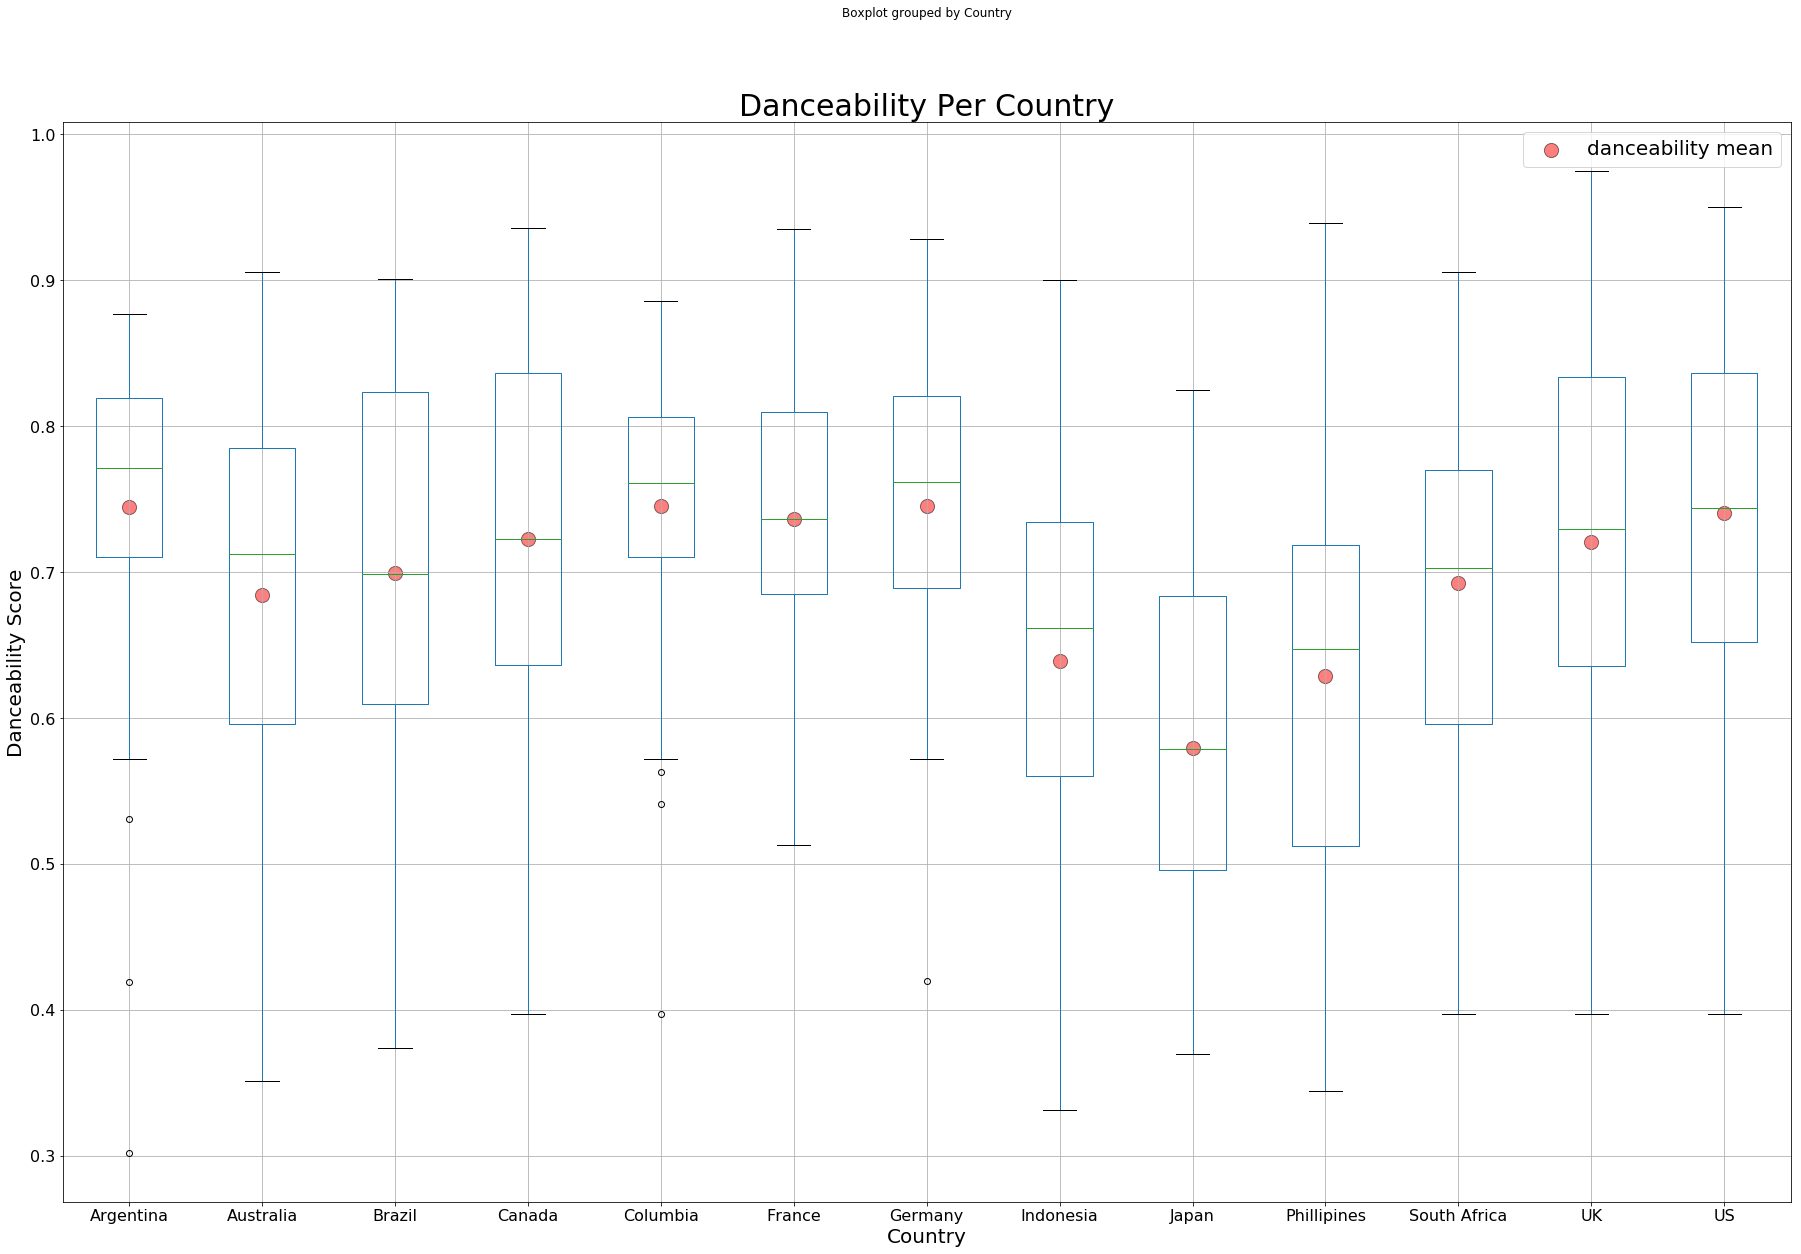

In [7]:
# Create boxplot grouped by country
country_df.boxplot("Danceability", by = "Country", figsize = (30,20))

# Get axis for current plot
ax = plt.gca()

# X-Axis from 1 to 12
x_axis = np.arange(ax.get_xlim()[0] + ax.get_xlim()[0], ax.get_xlim()[1], 1)

# Plot danceability mean for each country
plt.scatter(x_axis, country_danceability_mean["Danceability"], color = 'r', alpha = 0.5, edgecolor = 'k', s = 200, label = "danceability mean")

# Add labels and adjust fontsizes
plt.xlabel("Country", Fontsize = 20)
plt.xticks(Fontsize = 16)
plt.ylabel("Danceability Score", Fontsize = 20)
plt.yticks(Fontsize = 16)
plt.title("Danceability Per Country", Fontsize = 30)

# Add legend
plt.legend(loc = "best", prop={'size': 20})

# Save figure
plt.savefig("Images/Danceability__Per_Country_Boxplot.png")

plt.show()

In [8]:
danceability_value = []

for file in file_list:
    country_name = str(file).split("\\")[-1].split("_")[0]
    
    danceability_value.append(country_df[country_df['Country'] == f"{country_name}"]['Danceability'])

In [9]:
# Perform the ANOVA for all countries listed
stats.f_oneway(danceability_value[0],
               danceability_value[1],
               danceability_value[2],
               danceability_value[3],
               danceability_value[4],
               danceability_value[5],
               danceability_value[6],
               danceability_value[7],
               danceability_value[8],
               danceability_value[9],
               danceability_value[10],
               danceability_value[11],
               danceability_value[12])

F_onewayResult(statistic=9.40169212958605, pvalue=6.726348335654184e-17)

In [10]:
# Perform the ANOVA for Asia
group1 = country_df[country_df["Country"] == "Indonesia"]["Danceability"]
group2 = country_df[country_df["Country"] == "Japan"]["Danceability"]
group3 = country_df[country_df["Country"] == "Phillipines"]["Danceability"]

stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.8623011340736317, pvalue=0.06032709300472438)

# ANOVA Analysis Conclusions

__HYPOTHESIS:__  If a country’s Top 50 playlist is related to the danceability of the individual songs, then a majority of the songs in each country’s list will have high danceability score.

__NULL HYPOTHESIS:__ If a country's Top 50 playlist is not related to the danceability of the individual songs, then a majority of the songs in each country's list will not have high danceability scores.

>-  The test output for all observed countries yields an F-statistic of 9.401 and a p-value of 6.724e-17, indicating that there is no significant difference between the means of each country. Low statistic and p-value are indications of strong evidence against the null hypothesis.
-  The test output for Asian continent yields an F-statistic of 2.862 and a p-value of 0.0603, indicates strong evidence against the null hypothesis.
-  It is also necessary to mention that danceability scores for Top 50 playlists in Asian countries are lower in general than in the rest of the world.